In [2]:
from Bio import SeqIO

In [3]:
fastaseq = SeqIO.parse("files\\subsampled\\aligned.fasta", "fasta") #sequences ist die bereits die alignierte subsampled file

In [4]:
inf = []
seq = []
seqlen = []

for seq_record in fastaseq:
    print(seq_record.id)
    inf.append(seq_record.id)
    print(repr(seq_record.seq))
    seq.append(seq_record.seq)
    print(len(seq_record),"\n")
    seqlen.append(len(seq_record))
    
    
print("x")

UGA/MUWRP-KIR210110S/2021
Seq('------------------------------------------------------...---')
29903 

AUS/GC-277/2020
Seq('------------------------------------------TCGATCTCTTGT...---')
29903 

ZAF/NHLS-UCT-PA-J093/2022
Seq('--------------------------------------------------TTGT...---')
29903 

BRA/HRMS_1724/2020
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')
29903 

USA/WA-CDC-UW22121236470/2022
Seq('------------------------------------------------------...---')
29903 

RUS/6228/2022
Seq('---------------------AGGTAACAAACCAACCAACTTTCGATCTCTTGT...---')
29903 

Switzerland/BL-ETHZ-38006259/2022
Seq('NNNNNNNNNNNNNNNNNNNNNNNGAAACAAACCAACCAACTTTCGATCTCTTGT...NNN')
29903 

ZAF/NHLS-UCT-LA-ZB67/2022
Seq('--------------------------------------------------TTGT...---')
29903 

Liechtenstein/FL-Risch-1006R14257/2022
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')
29903 

THA/CONI-3829/2022
Seq('------------------------------------------------------...---')

IMS-10294-CVDP-541
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')
29903 

IMS-10603-CVDP-C10CF7B6-C79E-4FDC-8A26-64158608730C
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNACCAACCAACTTTCGATCTCTTGT...NNN')
29903 

IMS-10603-CVDP-E3BF6986-C122-43B5-804E-C82D140CE905
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNACCAACCAACTTTCGATCTCTTGT...NNN')
29903 

IMS-10294-CVDP-00299
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')
29903 

IMS-10215-CVDP-F2F60E50-978D-42BB-A786-B08671BD2916
Seq('NNNNNNNNNNTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...NNN')
29903 

IMS-10150-CVDP-75255214-712E-4751-81D6-A75A546BFBD3
Seq('------------------------------------------------------...---')
29903 

IMS-10061-CVDP-F1DE48E7-DE3A-4416-A498-09CE7280E0A9
Seq('------------------------------------------------------...---')
29903 

IMS-10013-CVDP-400CF282-7EE0-40E3-BB7B-C1A8A7244B33
Seq('NNNNAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')
29903 

IMS-10082-CVDP-AA69A922-6C49-4998-8E6D-8

In [5]:
#https://biopython.org/wiki/Phylo
#Siehe Anleitung für "Distance Tree Constructor"

In [6]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import AlignIO

In [7]:
#Alignment einlesen aus der Originaldatei. aln ist Kurzform für alignment
aln = AlignIO.read("files\\subsampled\\aligned.fasta", "fasta")

In [8]:
# Distanzmatrix erstellen
calculator = DistanceCalculator('identity')

In [9]:
alnsubset = aln[:10] #die get_distance Methode dauert sehr lange auf großen Datasets, hier also nicht das ganze Set sondern nur ein Sample

In [10]:
dm = calculator.get_distance(alnsubset)

In [11]:
dm

DistanceMatrix(names=['UGA/MUWRP-KIR210110S/2021', 'AUS/GC-277/2020', 'ZAF/NHLS-UCT-PA-J093/2022', 'BRA/HRMS_1724/2020', 'USA/WA-CDC-UW22121236470/2022', 'RUS/6228/2022', 'Switzerland/BL-ETHZ-38006259/2022', 'ZAF/NHLS-UCT-LA-ZB67/2022', 'Liechtenstein/FL-Risch-1006R14257/2022', 'THA/CONI-3829/2022'], matrix=[[0], [0.012908403839079652, 0], [0.005785372705079728, 0.01565060361836601, 0], [0.005885697087248731, 0.014580476875229897, 0.008728221248704093, 0], [0.009564257766779272, 0.01949637160151152, 0.006688292144600871, 0.010467177206300415, 0], [0.004447714276159531, 0.013410025749924781, 0.005250309333511671, 0.005016219108450626, 0.00943049192388723, 0], [0.009497374845333195, 0.01839280339765237, 0.0059191385479717695, 0.007056148212553959, 0.007557770123398977, 0.006788616526769875, 0], [0.019262281376450474, 0.029027187907567753, 0.014246062267999848, 0.022171688459351913, 0.020165200815971618, 0.018927866769220425, 0.019429488680065554, 0], [0.013878206200046872, 0.023409022506

In [12]:
#Aus der Distanzmatrix einen Baum erstellen mit Neighbor Joining
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator, 'nj')
tree = constructor.build_tree(alnsubset)

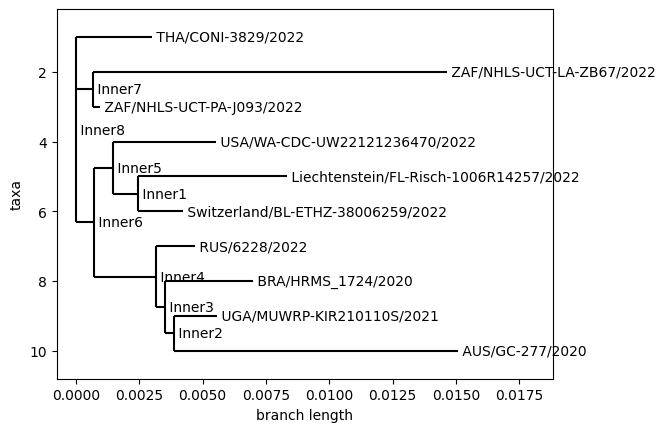

In [13]:
#Den Baum darstellen mit Wurzel
import Bio.Phylo as Phylo
tree.ladderize()  # Flip branches so deeper clades are displayed at top
Phylo.draw(tree) #Alternativ: Phylo.draw_ascii(tree)